# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
#pip install citipy

     -------------------------------------- 675.6/675.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675970 sha256=6cc11f02885d1f244d7d6e14e307a1c78b35a3fb81cd386d80c1793943d9429c
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ca\bd\d1\2bee2b54030fe2e29a1a6a7b10e6781aff17bdff423fc401d6
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units={"metric"}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | waingapu
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | mangalia
Processing Record 5 of Set 1 | beau vallon
Processing Record 6 of Set 1 | goure
Processing Record 7 of Set 1 | antalaha
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | port augusta
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | menongue
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | usogorsk
Processing Record 18 of Set 1 | howrah
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | hammerfest
Pro

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,29.41,86,20,1.54,MY,1693100663
1,waingapu,-9.6567,120.2641,28.21,59,4,7.39,ID,1693100939
2,yellowknife,62.4560,-114.3525,15.79,75,75,3.60,CA,1693100940
3,mangalia,43.8000,28.5833,23.55,72,0,2.25,RO,1693100940
4,beau vallon,-20.4189,57.6953,22.34,88,40,4.12,MU,1693100941


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,29.41,86,20,1.54,MY,1693100663
1,waingapu,-9.6567,120.2641,28.21,59,4,7.39,ID,1693100939
2,yellowknife,62.4560,-114.3525,15.79,75,75,3.60,CA,1693100940
3,mangalia,43.8000,28.5833,23.55,72,0,2.25,RO,1693100940
4,beau vallon,-20.4189,57.6953,22.34,88,40,4.12,MU,1693100941


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3258451871.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="x", edgecolors="black")


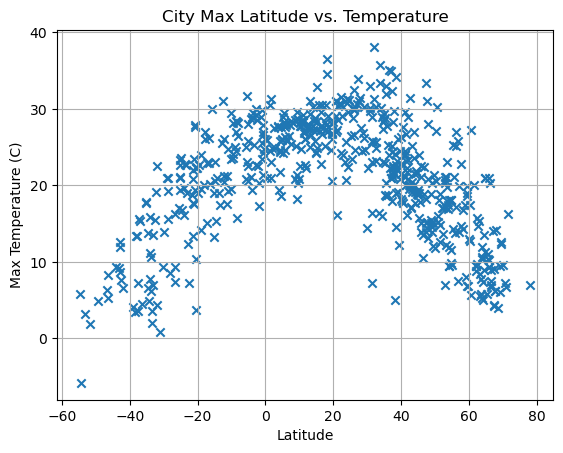

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="x", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

C:\Users\HP\AppData\Local\Temp\ipykernel_4612\2438287674.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="x", edgecolors="black")


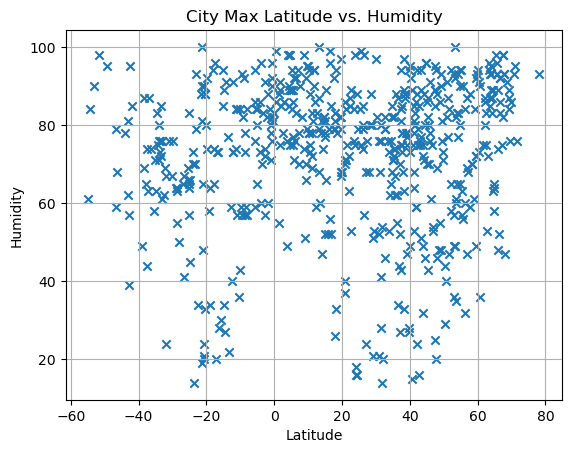

In [15]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="x", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\HP\AppData\Local\Temp\ipykernel_4612\1491692680.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="x", edgecolors="black")


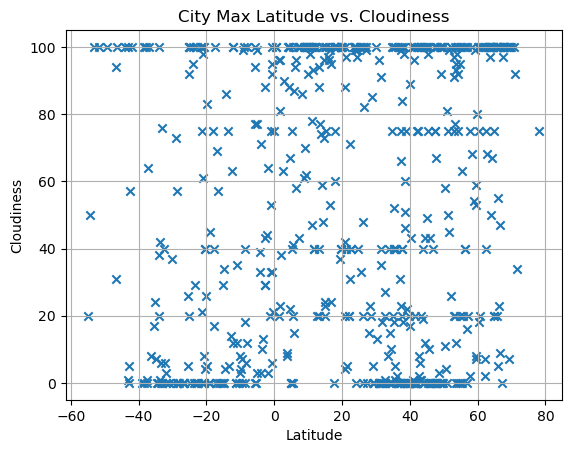

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="x", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3696709945.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="x", edgecolors="black")


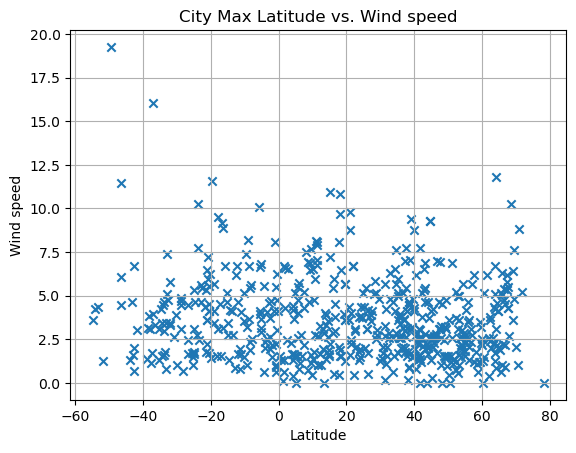

In [18]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="x", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Max Latitude vs. Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Print the r-value
    print(f"The r-value is: {r_value:.2f}")
    
    # Calculate regression line values
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="x", edgecolors="black")
    
    # Plot regression line
    plt.plot(x_values, regression_line, "r-")
    
    # Add annotation
    annotation = f"y = {slope:.2f}x + {intercept:.2f}\nR-value: {r_value:.2f}"
    plt.annotate(annotation, text_coordinates, fontsize=15, color="red")
    
    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    
    # Show plot
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,29.41,86,20,1.54,MY,1693100663
2,yellowknife,62.4560,-114.3525,15.79,75,75,3.60,CA,1693100940
3,mangalia,43.8000,28.5833,23.55,72,0,2.25,RO,1693100940
5,goure,13.9835,10.2704,30.20,47,100,1.37,NE,1693100941
7,iqaluit,63.7506,-68.5145,5.85,87,100,6.69,CA,1693100942


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waingapu,-9.6567,120.2641,28.21,59,4,7.39,ID,1693100939
4,beau vallon,-20.4189,57.6953,22.34,88,40,4.12,MU,1693100941
6,antalaha,-14.9003,50.2788,20.53,89,34,2.75,MG,1693100942
8,port augusta,-32.5000,137.7667,15.52,62,40,4.76,AU,1693100943
10,menongue,-14.6585,17.6910,15.36,27,4,1.29,AO,1693100944


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.70


C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3718705355.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, marker="x", edgecolors="black")


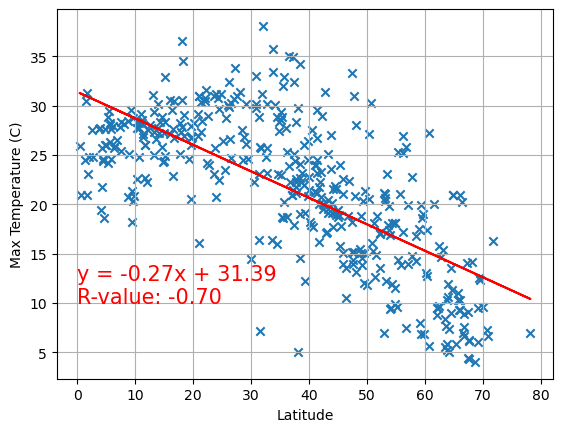

In [29]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (C)",
    "",
    (0, 10)
)

The r-value is: 0.79


C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3718705355.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, marker="x", edgecolors="black")


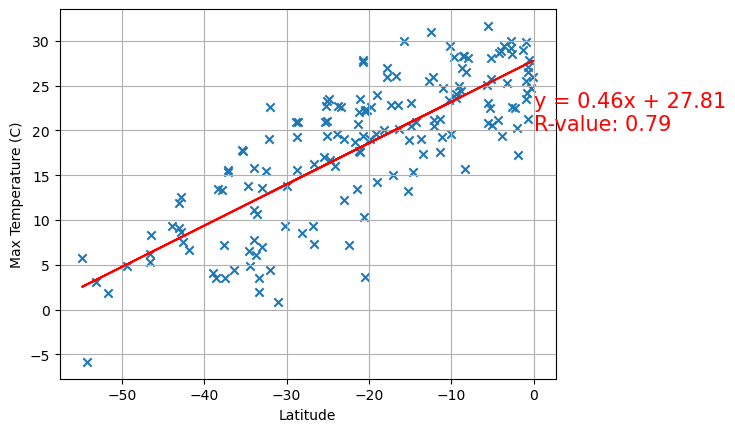

In [23]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (C)",
    "",
    (0, 20)
)

**Discussion about the linear relationship:** In both cases if the latitude has a big value both temperatures tend to decrease

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03


C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3718705355.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, marker="x", edgecolors="black")


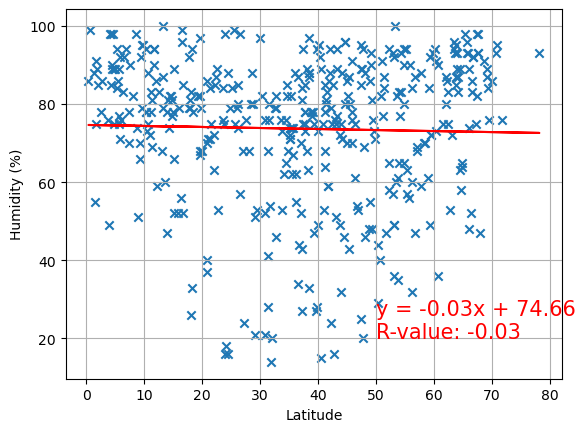

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "",
    (50, 20)
)

The r-value is: 0.08


C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3718705355.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, marker="x", edgecolors="black")


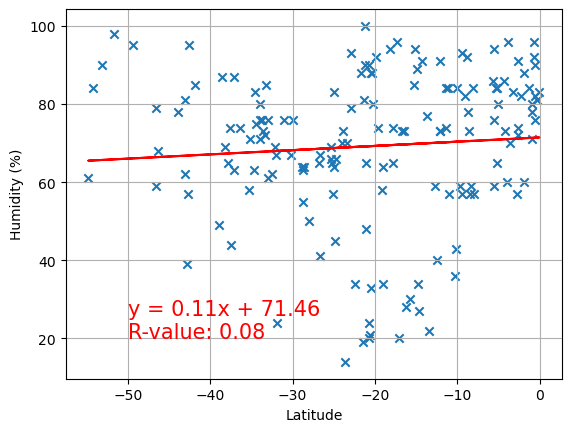

In [26]:
# Southern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "",
    (-50, 20)
)

**Discussion about the linear relationship:** In both regressions the huminidity stays more or less the same

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.05


C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3718705355.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, marker="x", edgecolors="black")


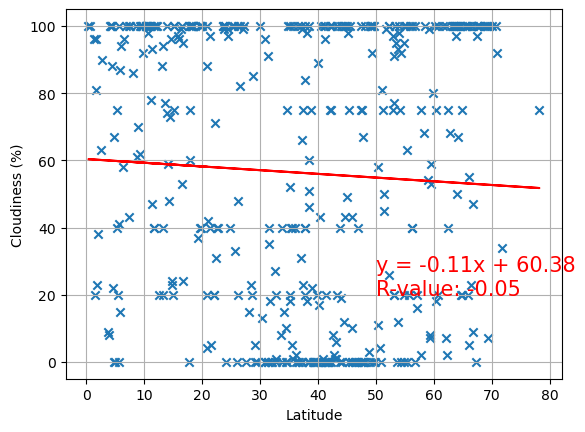

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "",
    (50, 20)
)

The r-value is: -0.03


C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3718705355.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, marker="x", edgecolors="black")


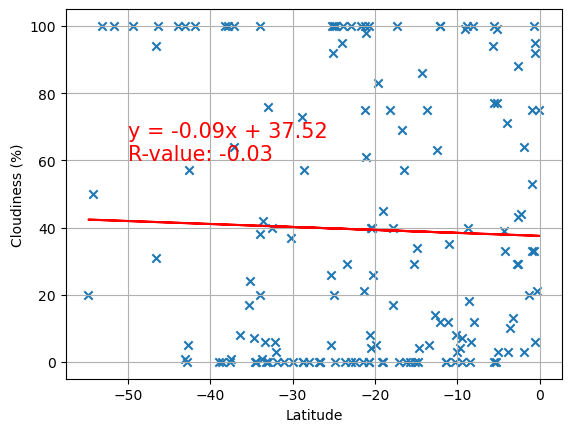

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "",
    (-50, 60)
)

**Discussion about the linear relationship:** The cloudiness doesnt have much relation with the latitude because in both cases we a variation in cloudiness without depending in its latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03


C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3718705355.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, marker="x", edgecolors="black")


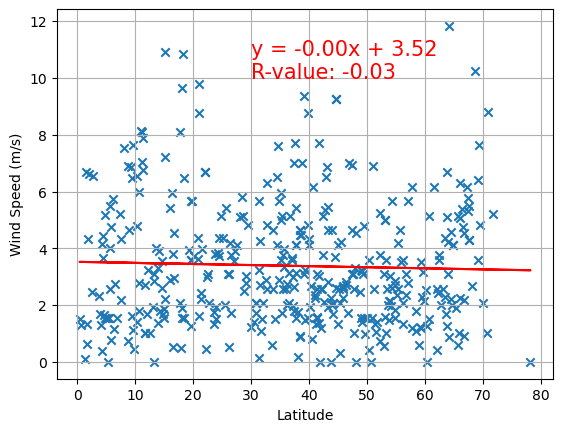

In [34]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "",
    (30, 10)
)

The r-value is: -0.07


C:\Users\HP\AppData\Local\Temp\ipykernel_4612\3718705355.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, marker="x", edgecolors="black")


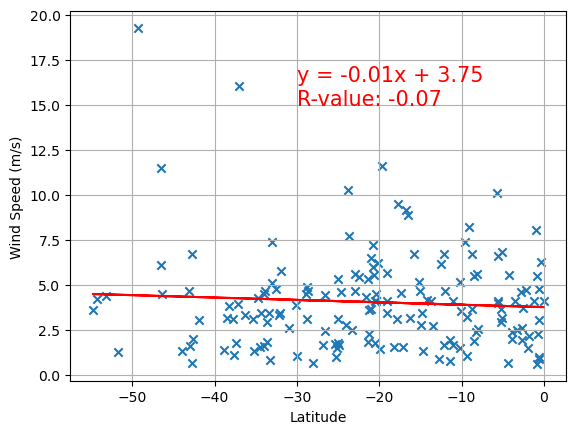

In [36]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "",
    (-30, 15)
)

**Discussion about the linear relationship:** In both cases the wind Speed is more or less the same